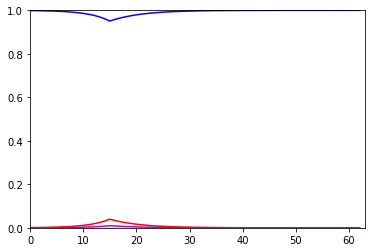

    xPlots    wPlots    dPlots    hPlots
0        0  0.999000  0.001000  0.000000
1        1  0.998600  0.001120  0.000280
2        2  0.998194  0.001445  0.000361
3        3  0.997671  0.001864  0.000466
4        4  0.996995  0.002404  0.000600
5        5  0.996124  0.003101  0.000774
6        6  0.995001  0.004000  0.000999
7        7  0.993552  0.005160  0.001287
8        8  0.991684  0.006656  0.001660
9        9  0.989275  0.008585  0.002139
10      10  0.986170  0.011074  0.002756
11      11  0.982167  0.014282  0.003550
12      12  0.977009  0.018419  0.004571
13      13  0.970365  0.023753  0.005882
14      14  0.961809  0.030627  0.007564
15      15  0.950799  0.039485  0.009716
16      16  0.958475  0.033308  0.008217
17      17  0.965039  0.028031  0.006930
18      18  0.970626  0.023543  0.005831
19      19  0.975364  0.019740  0.004897
20      20  0.979368  0.016527  0.004105
21      21  0.982743  0.013820  0.003436
22      22  0.985582  0.011545  0.002873
23      23  0.98

-62

In [5]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#graphing functions
def plot_2D(graphInfo, title="Generation plot"):
    fig=plt.figure()
    plt.plot(graphInfo["xPlots"],graphInfo["wPlots"],'b-')
    plt.plot(graphInfo["xPlots"],graphInfo["dPlots"],'r-')
    plt.plot(graphInfo["xPlots"],graphInfo["hPlots"],'m-')
    plt.axis([0,len(graphInfo["xPlots"]),0,1])
    plt.show()
def model3D(X,Y,Z,xLabel,yLabel, title):
    #3D graph
    import matplotlib.pyplot as plt
    from matplotlib import cm
    min=1000
    max=-1000
    for rIndex in range(len(Z)):
        for cIndex in range(len(Z[rIndex])):
            if Z[rIndex][cIndex]<min:
                min=Z[rIndex][cIndex]
            if Z[rIndex][cIndex]>max:
                max=Z[rIndex][cIndex]
    if min<-max:
        max=-min
    else:
        min=-max
    
    #label axes
    plt.xlabel(xLabel, fontdict=None, labelpad=None)
    plt.ylabel(yLabel, fontdict=None, labelpad=None)
    plt.title(title)

    
    plt.axis(aspect='image');
    plt.imshow(Z, origin='lower', extent=([0, 1, 0, 1]), vmax=max, vmin=min, cmap=cm.coolwarm)
    plt.show()

def update_vars(oldDataDict, newDataDict):
    for key in newDataDict.keys():
        oldDataDict[key]=newDataDict[key]
    return oldDataDict

def run_generation_iF(simData):
    #load variables
    d=simData['d']
    qW=simData['qW']
    qD=simData['qD']
    qH=simData['qH']
    sW=simData['sW']
    a=simData['a']
    e=simData['e']
    if simData['curGen']<=simData['induceStart']:
        sD=simData['sD']
    else:
        sD=a*simData['sDP']+(1-a)*simData['sD']

    #manuscript equations
    #variables to prevent redundant multiplication
    w2=(qW*(1-sW))**2
    wd=qW*(1-sW)*(qD*(1-sD))
    wh=qW*(1-sW)*(qH*(1-sD*d))
    d2=(qD*(1-sD))**2
    dh=qD*(1-sD)*(qH*(1-sD*d))
    h2=(qH*(1-sD*d))**2
    
    qWP=w2+wh+.25*h2
    qDP=e*(2*wd+wh+dh+.5*h2)+d2+dh+.25*h2
    qHP=(1-e)*(2*wd+wh+dh+.5*h2)
    #catch rounding errors from float multiplication
    total=qWP+qDP+qHP
    if total!=1:
        qWP/=total
        qDP/=total
        qHP/=total
    return {'qW':qWP,'qD':qDP,'qH':qHP}
    

def run_simulation_iF(simData,graph=False,table=False):
    graphInfo={"xPlots": [0], "wPlots": [simData['qW']], "dPlots": [simData['qD']], "hPlots": [simData['qH']]}
    for i in range(1,simData['generations']+1):
        simData['curGen']=i
        update_vars(simData,run_generation_iF(simData))
        graphInfo['xPlots'].append(i)
        graphInfo['wPlots'].append(simData['qW'])
        graphInfo['dPlots'].append(simData['qD'])
        graphInfo['hPlots'].append(simData['qH'])
        if simData['qW']>.99999:
            if graph:
                plot_2D(graphInfo)
            if table:
                print(pd.DataFrame(graphInfo))
            return -i
        elif simData['qD']>.99999:
            if graph:
                plot_2D(graphInfo)
            if table:
                print(pd.DataFrame(graphInfo))
            return i
    if graph:
        plot_2D(graphInfo)
    if table:
        print(pd.DataFrame(graphInfo))
    return 0

simData={'qW':.999,'qD':.001,'qH':0,'sW':0,'sD':.3,'e':.8,'d':.5,'sDP':.6,'a':.9,'generations':1000,'induceStart':15}
run_simulation_iF(simData,True,True)